In [12]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# y la distribución de las variables
# -------------------------------------------------------------------------------

import scipy.stats as stats
from scipy.stats import shapiro, levene
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu
from scipy.stats import chi2_contingency
from sklearn.linear_model import LinearRegression

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

In [13]:
from src import soporte as sp

## Ejercicio 

### Fase 1: Exploración y Limpieza

A. CUSTOMER FLIGHT ACTIVITY

Información sobre los datos: 

- Loyalty Number: Este atributo representa un identificador único para cada cliente dentro del programa de lealtad de la aerolínea. 
  Cada número de lealtad corresponde a un cliente específico.

- Year: Indica el año en el cual se registraron las actividades de vuelo para el cliente.

- Month: Representa el mes del año (de 1 a 12) en el cual ocurrieron las actividades de vuelo.

- Flights Booked: Número total de vuelos reservados por el cliente en ese mes específico.

- Flights with Companions: Número de vuelos reservados en los cuales el cliente viajó con acompañantes.

- Total Flights: El número total de vuelos que el cliente ha realizado, que puede incluir vuelos reservados en meses anteriores.

- Distance: La distancia total (presumiblemente en millas o kilómetros) que el cliente ha volado durante el mes.

- Points Accumulated: Puntos acumulados por el cliente en el programa de lealtad durante el mes, con base en la distancia volada u otros factores.

- Points Redeemed: Puntos que el cliente ha redimido en el mes, posiblemente para obtener beneficios como vuelos gratis, mejoras, etc.

- Dollar Cost Points Redeemed: El valor en dólares de los puntos que el cliente ha redimido durante el mes.

In [14]:
# Lectura del CSV 'Customer Flight Activity' y display de las 3 primeras filas para comprobar la estructura del archivo:

flight = pd.read_csv('data/Customer Flight Activity.csv')
flight.head(3)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0


In [15]:
# El método 'tail' muestra las 3 últimas filas del dataframe:

flight.tail(3)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
405621,999940,2018,12,3,0,3,1233,123.0,0,0
405622,999982,2018,12,0,0,0,0,0.0,0,0
405623,999986,2018,12,0,0,0,0,0.0,0,0


In [16]:
# Vamos a iterar por todas las columnas del DataFrame y a cada una de ellas la pondremos en minúsula y le aplicaremos un replace para cambiar los
# espacios por _ .

new_columns_flight = {columna: columna.lower().replace(" ", "_") for columna in flight.columns}

# comprobamos que hemos creado el diccionario correctamente
new_columns_flight

{'Loyalty Number': 'loyalty_number',
 'Year': 'year',
 'Month': 'month',
 'Flights Booked': 'flights_booked',
 'Flights with Companions': 'flights_with_companions',
 'Total Flights': 'total_flights',
 'Distance': 'distance',
 'Points Accumulated': 'points_accumulated',
 'Points Redeemed': 'points_redeemed',
 'Dollar Cost Points Redeemed': 'dollar_cost_points_redeemed'}

In [17]:
# una vez que tenemos el diccionario vamos a aplicar el método rename
flight.rename(columns = new_columns_flight, inplace = True)

# comprobamos que se han cambiado los nombres de las columnas
flight.head()

,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0


In [18]:

sp.exploracion(flight)

El DataFrame tiene 405624 filas y 10 columnas.
Tiene 1864 datos duplicados, lo que supone un porcentaje de 0.46% de los datos.

Hay 0 columnas con datos nulos, y son: 
[]

y sin nulos hay 10 columnas y son: 
['loyalty_number', 'year', 'month', 'flights_booked', 'flights_with_companions', 'total_flights', 'distance', 'points_accumulated', 'points_redeemed', 'dollar_cost_points_redeemed']


A continuación tienes un detalle sobre los datos nulos y los tipos y número de datos:
Principales estadísticos de las columnas categóricas:
No hay columnas categóricas en el DataFrame.
Principales estadísticos de las columnas numéricas:


,count,mean,std,min,25%,50%,75%,max
loyalty_number,405624.0,550037.873084,258935.286969,100018.0,326961.00,550834.0,772194.00,999986.0
year,405624.0,2017.500000,0.500001,2017.0,2017.00,2017.5,2018.00,2018.0
month,405624.0,6.500000,3.452057,1.0,3.75,6.5,9.25,12.0
flights_booked,405624.0,4.115052,5.225518,0.0,0.00,1.0,8.00,21.0
flights_with_companions,405624.0,1.031805,2.076869,0.0,0.00,0.0,1.00,11.0
total_flights,405624.0,5.146858,6.521227,0.0,0.00,1.0,10.00,32.0
distance,405624.0,1208.880059,1433.155320,0.0,0.00,488.0,2336.00,6293.0
points_accumulated,405624.0,123.692721,146.599831,0.0,0.00,50.0,239.00,676.5
points_redeemed,405624.0,30.696872,125.486049,0.0,0.00,0.0,0.00,876.0
dollar_cost_points_redeemed,405624.0,2.484503,10.150038,0.0,0.00,0.0,0.00,71.0


,% nulos,% no_nulos,tipo_dato,num_valores_unicos
loyalty_number,0.0%,100.0%,int64,16737
year,0.0%,100.0%,int64,2
month,0.0%,100.0%,int64,12
flights_booked,0.0%,100.0%,int64,22
flights_with_companions,0.0%,100.0%,int64,12
total_flights,0.0%,100.0%,int64,33
distance,0.0%,100.0%,int64,4746
points_accumulated,0.0%,100.0%,float64,1549
points_redeemed,0.0%,100.0%,int64,587
dollar_cost_points_redeemed,0.0%,100.0%,int64,49


Conclusiones generales:

- Existe una alta variabilidad entre los usuarios: la mayoría de los clientes parecen estar en los rangos bajos de todas las métricas (vuelos, puntos, distancias), pero un pequeño grupo de clientes está mucho más comprometido y participa activamente en el programa de lealtad.

- Aunque los clientes acumulan puntos, la mayoría no parece canjearlos; sin embargo, un pequeño número de clientes viajan mucho (hasta 32 vuelos) y canjean bastantes puntos.

In [19]:

# Almaceno en un dataframe los duplicados para ver cómo son y analizarlos:
# 'keep=False' asegurará que todas las filas se marquen como duplicadas, no solo las adicionales, sino también la original.

duplicated_df = flight[flight.duplicated(keep=False)]

In [20]:
duplicated_df.head(10)

,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed
41,101902,2017,1,0,0,0,0,0.0,0,0
42,101902,2017,1,0,0,0,0,0.0,0,0
226,112142,2017,1,0,0,0,0,0.0,0,0
227,112142,2017,1,0,0,0,0,0.0,0,0
477,126100,2017,1,0,0,0,0,0.0,0,0
478,126100,2017,1,0,0,0,0,0.0,0,0
566,130331,2017,1,0,0,0,0,0.0,0,0
567,130331,2017,1,0,0,0,0,0.0,0,0
659,135421,2017,1,0,0,0,0,0.0,0,0
660,135421,2017,1,0,0,0,0,0.0,0,0


In [21]:
# Después de revisar los duplicados, he decidido eliminar aquellos en los que la fila entera está duplicada: 

flight = flight.drop_duplicates()

In [22]:
print(f'El número de filas que tenemos, después de eliminar las duplicadas, es de {flight.shape[0]}.')

El número de filas que tenemos, después de eliminar las duplicadas, es de 403760.


In [23]:
# Guardo el CSV limpio.

flight.to_csv('data/flight_activity_clean.csv')

B. CUSTOMER LOYALTY HISTORY

Información sobre los datos:

- Loyalty Number: Identificador único del cliente dentro del programa de lealtad. Permite correlacionar la información de este archivo con el archivo de actividad de vuelos.

- Country: País de residencia del cliente.

- Province: Provincia o estado de residencia del cliente (aplicable a países con divisiones provinciales o estatales, como Canadá).

- City: Ciudad de residencia del cliente.

- Postal Code: Código postal del cliente.

- Gender: Género del cliente (ej. Male para masculino y Female para femenino)

- Education: Nivel educativo alcanzado por el cliente (ej. Bachelor para licenciatura, College para estudios universitarios o técnicos, etc.).

- Salary: Ingreso anual estimado del cliente.

- Marital Status: Estado civil del cliente (ej. Single para soltero, Married para casado, Divorced para divorciado, etc.).

- Loyalty Card: Tipo de tarjeta de lealtad que posee el cliente. Esto podría indicar distintos niveles o categorías dentro del programa de lealtad.

- CLV (Customer Lifetime Value): Valor total estimado que el cliente aporta a la empresa durante toda la relación que mantiene con ella.

- Enrollment Type: Tipo de inscripción del cliente en el programa de lealtad (ej. Standard).

- Enrollment Year: Año en que el cliente se inscribió en el programa de lealtad.

- Enrollment Month: Mes en que el cliente se inscribió en el programa de lealtad.

- Cancellation Year: Año en que el cliente canceló su membresía en el programa de lealtad, si aplica.

- Cancellation Month: Mes en que el cliente canceló su membresía en el programa de lealtad, si aplica.




In [24]:
# Lectura del CSV 'Customer Loyalty History' y display de las 3 primeras filas para comprobar la estructura del archivo:

loyalty = pd.read_csv('data/Customer Loyalty History.csv')
loyalty.head(3)

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0


In [25]:
# El método 'tail' muestra las 3 últimas filas del dataframe:

loyalty.tail(3)

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
16734,776187,Canada,British Columbia,Vancouver,V5R 1W3,Male,College,NaN,Single,Star,74228.52,Standard,2014,3,NaN,NaN
16735,906428,Canada,Yukon,Whitehorse,Y2K 6R0,Male,Bachelor,-57297.0,Married,Star,10018.66,2018 Promotion,2018,4,NaN,NaN
16736,652627,Canada,Manitoba,Winnipeg,R2C 0M5,Female,Bachelor,75049.0,Married,Star,83325.38,Standard,2015,12,2016.0,8.0


In [26]:
# Vamos a iterar por todas las columnas del DataFrame y a cada una de ellas la pondremos en minúsula y le aplicaremos un replace para cambiar los
# espacios por _ .

new_columns_loyalty = {columna: columna.lower().replace(" ", "_") for columna in loyalty.columns}

# comprobamos que hemos creado el diccionario correctamente
new_columns_loyalty

{'Loyalty Number': 'loyalty_number',
 'Country': 'country',
 'Province': 'province',
 'City': 'city',
 'Postal Code': 'postal_code',
 'Gender': 'gender',
 'Education': 'education',
 'Salary': 'salary',
 'Marital Status': 'marital_status',
 'Loyalty Card': 'loyalty_card',
 'CLV': 'clv',
 'Enrollment Type': 'enrollment_type',
 'Enrollment Year': 'enrollment_year',
 'Enrollment Month': 'enrollment_month',
 'Cancellation Year': 'cancellation_year',
 'Cancellation Month': 'cancellation_month'}

In [27]:
# una vez que tenemos el diccionario vamos a aplicar el método rename
loyalty.rename(columns = new_columns_loyalty, inplace = True)

# comprobamos que se han cambiado los nombres de las columnas
loyalty.head()

,loyalty_number,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN


In [28]:
sp.exploracion(loyalty)

El DataFrame tiene 16737 filas y 16 columnas.
Tiene 0 datos duplicados, lo que supone un porcentaje de 0.0% de los datos.

Hay 3 columnas con datos nulos, y son: 
['salary', 'cancellation_year', 'cancellation_month']

y sin nulos hay 13 columnas y son: 
['loyalty_number', 'country', 'province', 'city', 'postal_code', 'gender', 'education', 'marital_status', 'loyalty_card', 'clv', 'enrollment_type', 'enrollment_year', 'enrollment_month']


A continuación tienes un detalle sobre los datos nulos y los tipos y número de datos:
Principales estadísticos de las columnas categóricas:


,count,unique,top,freq
country,16737,1,Canada,16737
province,16737,11,Ontario,5404
city,16737,29,Toronto,3351
postal_code,16737,55,V6E 3D9,911
gender,16737,2,Female,8410
education,16737,5,Bachelor,10475
marital_status,16737,3,Married,9735
loyalty_card,16737,3,Star,7637
enrollment_type,16737,2,Standard,15766


Principales estadísticos de las columnas numéricas:


,count,mean,std,min,25%,50%,75%,max
loyalty_number,16737.0,549735.880445,258912.132453,100018.00,326603.00,550434.00,772019.00,999986.00
salary,12499.0,79245.609409,35008.297285,-58486.00,59246.50,73455.00,88517.50,407228.00
clv,16737.0,7988.896536,6860.982280,1898.01,3980.84,5780.18,8940.58,83325.38
enrollment_year,16737.0,2015.253211,1.979111,2012.00,2014.00,2015.00,2017.00,2018.00
enrollment_month,16737.0,6.669116,3.398958,1.00,4.00,7.00,10.00,12.00
cancellation_year,2067.0,2016.503145,1.380743,2013.00,2016.00,2017.00,2018.00,2018.00
cancellation_month,2067.0,6.962748,3.455297,1.00,4.00,7.00,10.00,12.00


,% nulos,% no_nulos,tipo_dato,num_valores_unicos
loyalty_number,0.0%,100.0%,int64,16737
country,0.0%,100.0%,object,1
province,0.0%,100.0%,object,11
city,0.0%,100.0%,object,29
postal_code,0.0%,100.0%,object,55
gender,0.0%,100.0%,object,2
education,0.0%,100.0%,object,5
salary,25.32%,74.68%,float64,5890
marital_status,0.0%,100.0%,object,3
loyalty_card,0.0%,100.0%,object,3


**Nota:** el nº de filas de este CSV coincide con los valores únicos de la columna 'loyalty_number' del otro CSV, es decir, 16737 clientes.

In [29]:
# Hayo el porcentaje de los datos nulos

null_perc = (loyalty.isnull().sum() / loyalty.shape[0]) * 100
null_perc

loyalty_number         0.000000
country                0.000000
province               0.000000
city                   0.000000
postal_code            0.000000
gender                 0.000000
education              0.000000
salary                25.321145
marital_status         0.000000
loyalty_card           0.000000
clv                    0.000000
enrollment_type        0.000000
enrollment_year        0.000000
enrollment_month       0.000000
cancellation_year     87.650117
cancellation_month    87.650117
dtype: float64

In [30]:
# lo convertimos a DataFrame
loyalty_null = pd.DataFrame(null_perc, columns = ["%_nulos"])

# filtramos el DataFrame para quedarnos solo con aquellas columnas que tengan nulos
loyalty_null[loyalty_null["%_nulos"] > 0]

,%_nulos
salary,25.321145
cancellation_year,87.650117
cancellation_month,87.650117


Tenemos nulos en las columnas:

- Salary

- Cancellation Year

- Cancellation Month  

La cantidad de nulos de las 2 últimas columnas es muy elevada pero aportan información relevante, ya que con casi total seguridad, esa ausencia de datos significa que las cancelaciones aún no se han producido.




Optaré por imputar con un valor indicativo como "0" (es decir, aún no se ha registrado cancelación) los nulos de las columnas 'cancellation_month' y
'cancellation_year'.

In [31]:

loyalty["cancellation_month"]= loyalty["cancellation_month"].fillna(0)
loyalty["cancellation_year"]= loyalty["cancellation_year"].fillna(0)

loyalty.head(3)

,loyalty_number,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,0.0,0.0
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,0.0,0.0
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0


In [32]:
# Verificar cuántos valores nulos quedan
print(loyalty['cancellation_month'].isna().sum())  # Debería ser 0
print(loyalty['cancellation_year'].isna().sum())   # Debería ser 0

0
0


In [33]:
# En la columna 'salary' tenemos muchos valores NaN, es decir, no disponemos de datos y habrá que tratar esos nulos.

# Voy a ver que tengo en la columna 'salary':

loyalty['salary']

0         83236.0
1             NaN
2             NaN
3             NaN
4        103495.0
           ...   
16732         NaN
16733     89210.0
16734         NaN
16735    -57297.0
16736     75049.0
Name: salary, Length: 16737, dtype: float64

In [34]:
# Entiendo la presencia de valores negativos en esta columna como un error al cargar los datos, así que eliminaré esos negativos quitándoles 
# el signo -, transformándolos en valores absolutos usando la función 'abs()':

loyalty['salary'] = abs(loyalty['salary'])
loyalty['salary']

0         83236.0
1             NaN
2             NaN
3             NaN
4        103495.0
           ...   
16732         NaN
16733     89210.0
16734         NaN
16735     57297.0
16736     75049.0
Name: salary, Length: 16737, dtype: float64

In [35]:
# Almaceno los nulos para comprobar cómo son y qué características tienen:

salary_null = loyalty[loyalty['salary'].isnull()]
salary_null.head()

,loyalty_number,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,0.0,0.0
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,0.0,0.0
6,927943,Canada,Ontario,Toronto,P5S 6R4,Female,College,NaN,Single,Star,3857.95,Standard,2014,6,0.0,0.0
13,988178,Canada,Quebec,Montreal,H4G 3T4,Male,College,NaN,Single,Star,3871.07,Standard,2013,10,0.0,0.0


In [36]:
salary_null.sample(5)

,loyalty_number,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month
11885,606396,Canada,Ontario,Toronto,M2M 7K8,Female,College,NaN,Single,Star,8255.06,2018 Promotion,2018,4,2018.0,12.0
1622,246690,Canada,British Columbia,Vancouver,V1E 4R6,Male,College,NaN,Single,Aurora,7343.35,2018 Promotion,2018,3,0.0,0.0
13353,811162,Canada,Newfoundland,St. John's,A1C 6H9,Female,College,NaN,Married,Star,5095.44,Standard,2012,7,0.0,0.0
16600,898427,Canada,Saskatchewan,Regina,S1J 3C5,Male,College,NaN,Single,Star,7751.86,2018 Promotion,2018,4,0.0,0.0
8564,381284,Canada,Ontario,Ottawa,K1F 2R2,Male,College,NaN,Single,Nova,9476.90,Standard,2018,7,0.0,0.0


In [37]:
# En las muestras que he filtrado, todas los registros con nulo en 'salary', en 'education' son 'College'...
# Voy a hacer un recuento de los distintos valores para la columna 'education' donde 'salary' es nulo: 

print(f"Las categorias de Educación que tienen nulos en salary son:{loyalty[loyalty['salary'].isna()]['education'].unique()}")


print(f"Clientes con educación 'college'= {loyalty[loyalty['education'] == 'College']['loyalty_number'].count()}")

print(f"Clientes con salary nulo = {loyalty['salary'].isnull().sum()}")


Las categorias de Educación que tienen nulos en salary son:['College']
Clientes con educación 'college'= 4238
Clientes con salary nulo = 4238


**Conclusión:** No se ha hecho una buena recogida de datos del grupo College, porque no tenemos información de su salario en ninguno de ellos.


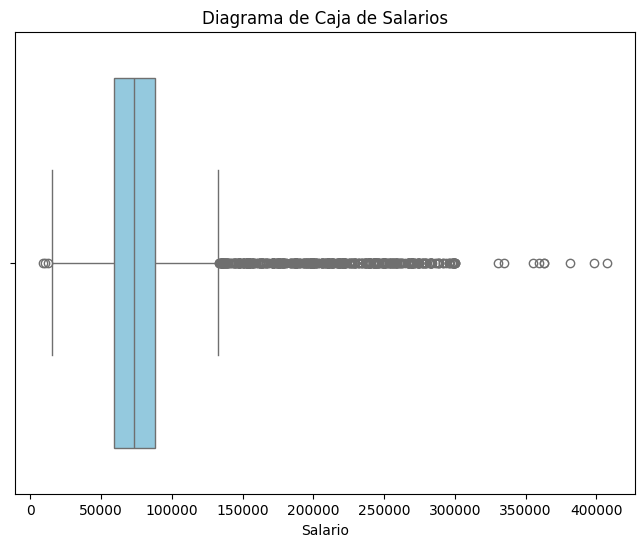

In [38]:
# Ahora voy a comprobar si dentro de la columna 'salary' tenemos valores atípicos.

# establecemos el tamaño de la figura
plt.figure(figsize=(8, 6))

# utilizando el método boxplot visualizamos la mediana, cambiamos el color del boxplot
sns.boxplot(x='salary', 
            data=loyalty, 
            color='skyblue')

# cambiamos el nombre del eje x
plt.xlabel('Salario')

# ponems título a la gráfica
plt.title('Diagrama de Caja de Salarios');

 Para gestionar los valores nulos, dado que su tanto por ciento respecto al total de datos no es demasiado elevado, podría usar la media o la mediana de la columna 'salary'. 
 
 Después de observar la cantidad de valores atípicos que existen en los datos, utilizaré la mediana; que es mucho más resistente que la media a los valores atípicos, ya que toma el valor central de los datos y no se ve afectada por esos valores extremos que pueden distorsionar el resultado.

In [39]:
salary_mean = loyalty['salary'].mean()

description = round(loyalty.describe(),2).T

print(salary_mean)

loyalty['salary'] = loyalty['salary'].fillna(salary_mean)

print(f'Los datos descriptivos después de la sustitución:{description}')

79359.34090727258
Los datos descriptivos después de la sustitución:                      count       mean        std        min        25%  \
loyalty_number      16737.0  549735.88  258912.13  100018.00  326603.00   
salary              12499.0   79359.34   34749.69    9081.00   59246.50   
clv                 16737.0    7988.90    6860.98    1898.01    3980.84   
enrollment_year     16737.0    2015.25       1.98    2012.00    2014.00   
enrollment_month    16737.0       6.67       3.40       1.00       4.00   
cancellation_year   16737.0     249.04     663.47       0.00       0.00   
cancellation_month  16737.0       0.86       2.59       0.00       0.00   

                          50%        75%        max  
loyalty_number      550434.00  772019.00  999986.00  
salary               73455.00   88517.50  407228.00  
clv                   5780.18    8940.58   83325.38  
enrollment_year       2015.00    2017.00    2018.00  
enrollment_month         7.00      10.00      12.00  
cancella

In [40]:
# Compruebo el resultado de la gestión de los nulos:

loyalty.isnull().sum()

loyalty_number        0
country               0
province              0
city                  0
postal_code           0
gender                0
education             0
salary                0
marital_status        0
loyalty_card          0
clv                   0
enrollment_type       0
enrollment_year       0
enrollment_month      0
cancellation_year     0
cancellation_month    0
dtype: int64

In [41]:
# Guardo el DataFrame:

loyalty.to_csv('data/loyalty_history_clean.csv')

UNIMOS LOS DATAFRAMES:

Como tienen datos complementarios, y una columna común, podemos usar el metodo merge, realizando un inner join 
con la columna común como nexo.
el metodo merge si no especificamos nada por defecto usa un inner join, podríamos añadir how='inner' pero no hace falta.

In [42]:

customer_final = loyalty.merge(flight, on='loyalty_number', how='left')

In [43]:
# guardo el nuevo dataframe 
customer_final.to_csv('data/customer_final.csv', index=False)

In [44]:
customer_final = pd.read_csv('data/customer_final.csv')
customer_final.head(3)

,loyalty_number,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,0.0,0.0,2017,1,0,0,0,0,0.0,0,0
1,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,0.0,0.0,2017,2,3,0,3,2823,282.0,0,0
2,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,0.0,0.0,2017,3,0,0,0,0,0.0,0,0


In [46]:
sp.exploracion(customer_final)

El DataFrame tiene 403760 filas y 25 columnas.
Tiene 0 datos duplicados, lo que supone un porcentaje de 0.0% de los datos.

Hay 0 columnas con datos nulos, y son: 
[]

y sin nulos hay 25 columnas y son: 
['loyalty_number', 'country', 'province', 'city', 'postal_code', 'gender', 'education', 'salary', 'marital_status', 'loyalty_card', 'clv', 'enrollment_type', 'enrollment_year', 'enrollment_month', 'cancellation_year', 'cancellation_month', 'year', 'month', 'flights_booked', 'flights_with_companions', 'total_flights', 'distance', 'points_accumulated', 'points_redeemed', 'dollar_cost_points_redeemed']


A continuación tienes un detalle sobre los datos nulos y los tipos y número de datos:
Principales estadísticos de las columnas categóricas:


,count,unique,top,freq
country,403760,1,Canada,403760
province,403760,11,Ontario,130258
city,403760,29,Toronto,80775
postal_code,403760,55,V6E 3D9,21944
gender,403760,2,Female,202757
education,403760,5,Bachelor,252567
marital_status,403760,3,Married,234845
loyalty_card,403760,3,Star,183745
enrollment_type,403760,2,Standard,380419


Principales estadísticos de las columnas numéricas:


,count,mean,std,min,25%,50%,75%,max
loyalty_number,403760.0,549875.383713,258961.514684,100018.00,326699.00,550598.000000,772152.00,999986.00
salary,403760.0,79368.594391,30008.343680,9081.00,63901.00,79359.340907,82940.00,407228.00
clv,403760.0,7990.864857,6863.317160,1898.01,3981.78,5776.340000,8937.12,83325.38
enrollment_year,403760.0,2015.250716,1.979427,2012.00,2014.00,2015.000000,2017.00,2018.00
enrollment_month,403760.0,6.667555,3.398829,1.00,4.00,7.000000,10.00,12.00
cancellation_year,403760.0,247.967706,662.224505,0.00,0.00,0.000000,0.00,2018.00
cancellation_month,403760.0,0.856122,2.587429,0.00,0.00,0.000000,0.00,12.00
year,403760.0,2017.500352,0.500000,2017.00,2017.00,2018.000000,2018.00,2018.00
month,403760.0,6.501335,3.451982,1.00,4.00,7.000000,10.00,12.00
flights_booked,403760.0,4.134050,5.230064,0.00,0.00,1.000000,8.00,21.00


,% nulos,% no_nulos,tipo_dato,num_valores_unicos
loyalty_number,0.0%,100.0%,int64,16737
country,0.0%,100.0%,object,1
province,0.0%,100.0%,object,11
city,0.0%,100.0%,object,29
postal_code,0.0%,100.0%,object,55
gender,0.0%,100.0%,object,2
education,0.0%,100.0%,object,5
salary,0.0%,100.0%,float64,5891
marital_status,0.0%,100.0%,object,3
loyalty_card,0.0%,100.0%,object,3
